# To generate the data using in Figure S3 of the supplement

In [12]:
import scipy.io
from scipy import stats, optimize, interpolate
import pandas as pd
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## import the data from mat format and generate a dataframe with it

In [29]:
names=['d1','d2','d3','d4','d5','d6','d7']
meaning=['0.05% Gal','0.2% Gal','2% Gal','2% Glucose','4% Gal','Cdc42 promoter','NO-GFP']
reads=defaultdict(dict)
i=0
for each in names:
    r= scipy.io.loadmat(each + '.mat')
    reads[each]['data'] =r[each]
    reads[each]['log10']=np.log10(r[each])
    reads[each]['geomean_log10']=scipy.stats.mstats.gmean(np.log10(r[each]), axis=0)
    reads[each]['geomean']=scipy.stats.mstats.gmean((r[each]), axis=0)
    reads[each]['std_log10']=np.std(np.log10(r[each]))
    reads[each]['Names']=meaning[i]
    reads[each]['Length of data']=len(r[each])
    i=i+1
pd_reads=pd.DataFrame(reads).T

In [30]:
pd_reads

,Length of data,Names,data,geomean,geomean_log10,log10,std_log10
d1,15440,0.05% Gal,"[[23.9453], [62.9713], [26.9458], [48.8967], [...",[41.97598543295089],[1.579878441391319],"[[1.379220282494868], [1.799142659111158], [1....",0.316526
d2,7255,0.2% Gal,"[[419.872], [27.9486], [557.71], [710.213], [5...",[621.3460420195476],[2.747825074614713],"[[2.623116913811673], [1.4463600581078564], [2...",0.413008
d3,10988,2% Gal,"[[1487.42], [2460.03], [2737.32], [1260.12], [...",[1758.7984936120897],[3.234738322542425],"[[3.1724336167583242], [3.3909404033452546], [...",0.2137
d4,21309,2% Glucose,"[[21.9472], [18.9628], [7.97859], [37.9679], [...",[19.66960786115788],[1.2209275752001363],"[[1.3413791212926924], [1.2779024645826027], [...",0.371226
d5,2545,4% Gal,"[[1191.24], [1857.25], [2391.84], [1410.07], [...",[1572.9678863705362],[3.1824907062556913],"[[3.0759992679271404], [3.2688703670207335], [...",0.237762
d6,25803,Cdc42 promoter,"[[361.76], [613.638], [193.831], [324.2], [216...",[279.148799993508],[2.437028664522126],"[[2.5584205450012845], [2.787912245789874], [2...",0.202961
d7,27798,NO-GFP,"[[21.9472], [18.9628], [8.97833], [7.97859], [...",[18.156320669963268],[1.1819224775840171],"[[1.3413791212926924], [1.2779024645826027], [...",0.378805


In [31]:
pd_reads.to_excel('data-histograms.xlsx')

## Figure S3 histograms

Text(0,0.5,'Normalized frequency')

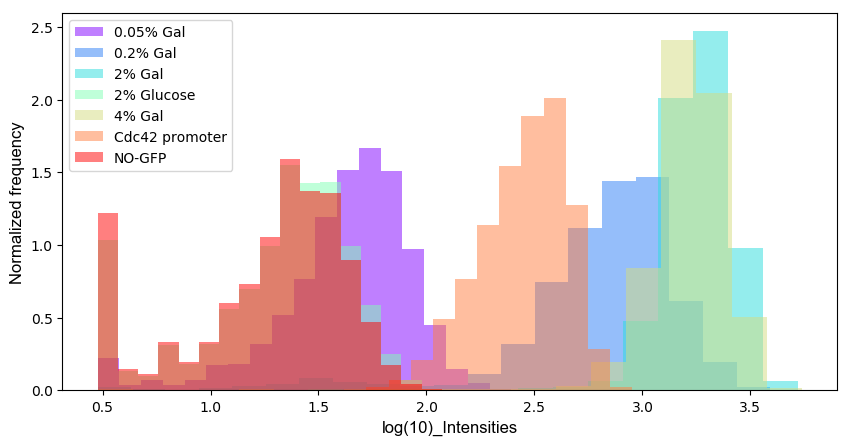

In [33]:
fig, axes = plt.subplots(1,1, figsize=(10,5), dpi=100, sharex=True, sharey=True)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'12'}
colors = cm.rainbow(np.linspace(0, 1, len(pd_reads['Names'])))
keys=pd_reads['Names']   
i=0
for y, c in zip(keys, colors):
    plt.hist(pd_reads['log10'][i],bins=20,density=True,label=pd_reads['Names'][i],stacked=True,alpha=0.5,color=c)
    i=i+1


#plt.hist(pd_reads['log10'],**kwargs,label=pd_reads['Names'])
plt.legend(prop={'size': 10},loc='upper left')
plt.xlabel('log(10)_Intensities',**axis_font)
plt.ylabel('Normalized frequency',**axis_font)

## Bar plot of the geometric mean and standard deviations (inset of the Fig S3)

Text(0,0.5,'Geometric mean of Log10(Intensities)')

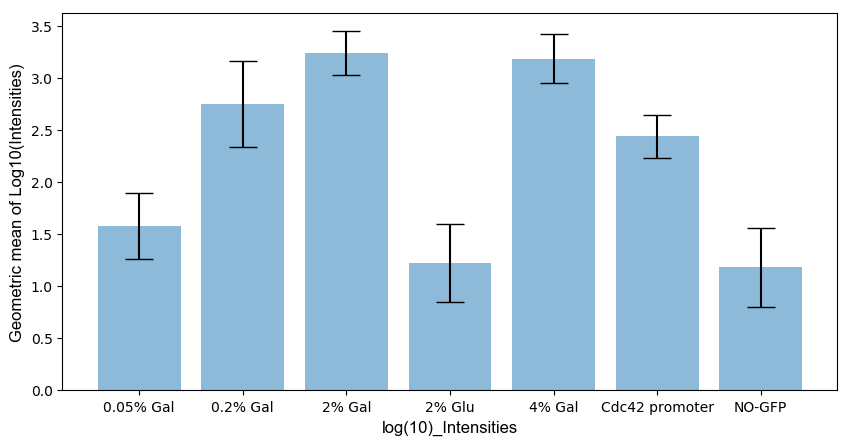

In [5]:
fig, axes = plt.subplots(1,1, figsize=(10,5), dpi=100, sharex=True, sharey=True)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'12'}
plt.bar(x=pd_reads['Names'],height=pd_reads['geomean_log10'],yerr=pd_reads['std_log10'],align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xlabel('log(10)_Intensities',**axis_font)
plt.ylabel('Geometric mean of Log10(Intensities)',**axis_font)